## Arabic_lm

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
from nlputils import split_wiki,get_wiki

In [2]:
bs=128
torch.cuda.set_device(0)
data_path = "/onepanel/fast_ai_nlp/data"

lang = 'ar'
name = f'{lang}wiki'
path = pathlib.PosixPath(f'{data_path}')
# path.mkdir(exist_ok=True, parents=True)

In [3]:
# mdl_path = path/'models'
# mdl_path.mkdir(exist_ok=True)
# lm_fns = [mdl_path/f'{lang}_wt', mdl_path/f'{lang}_wt_vocab']

In [4]:
dest = split_wiki(path,lang)

/onepanel/fast_ai_nlp/data/docs already exists; not splitting


In [5]:
data = (TextList.from_folder(dest, processor=[OpenFileProcessor(), SPProcessor()]))
#         .split_by_rand_pct(0.1, seed=42)
#         .label_for_lm()
#         .databunch(bs=bs, num_workers=8))

# data.save(f'{lang}_databunch')
# len(data.vocab.itos),len(data.train_ds)

In [6]:
data = data.split_by_rand_pct(0.1, seed = 3)

In [ ]:
data

In [7]:
data = data.label_for_lm()

In [8]:
data

LabelLists;

Train: LabelList (64263 items)
x: LMTextList
▁xxbos ▁ولاية ▁الطا رف ▁ولاية ▁الطا رف ▁الواقعة ▁ب أقصى ▁شمال ▁شرق ▁البلاد ▁والم جاور ة ▁عن ابة ▁التي ▁كانت ▁تابعة ▁لها ▁ لغاية ▁يناير ▁1984 ▁أصبحت ▁ولاية ▁رقم ▁( 36 )، ▁تسميتها ▁ولاية ▁خضر ا ▁وهي ▁المشهورة ▁بطبيعته ا ▁المع طاء ▁ومناطق ها ▁الرطبة ▁وبي ئت ها ▁ال سخ ية ، ▁تتميز ▁ولاية ▁الطا رف ▁ب طابع ها ▁الفلاح ي ▁و غابات ها ▁الكثيفة ▁و شواطئ ها ▁الجميلة ▁( حوالي ▁20 ▁شاطئ )، ▁وتتميز ▁بع نب ها ▁الذي ▁يعتبر ▁من ▁أ جود ▁أنواع ▁العنب ▁وطني ا ، ▁تتكون ▁ولاية ▁الطا رف ▁من ▁(7 ▁دوائر ) ▁و ( 24 ▁بلدية ) ▁تت ربع ▁على ▁مساحة ▁غاب ية ▁تقدر ▁ب 1 66 ▁ألف ▁هكتار ، ▁أي ▁ما ▁نسبته ▁54 ▁بالمئة ▁من ▁المساحة ▁الكلية ▁للولاية ، ▁تتميز ▁بال تنوع ▁البيئي ▁و كثافة ▁المكونات ▁الغاب ية ▁والحيوان ية ، ▁ما ▁جعلها ▁ثاني ▁أكبر ▁ولاية ▁غاب ية ▁في ▁الجزائر ، ▁تبعد ▁عن ▁المطار ▁الدولي ▁( عن ابة ) ▁ب ▁( ساعة ▁و ▁29 د ). ▁تقع ▁في ▁أقصى ▁الشمال ▁الشرقي ▁للجزائر ▁وهي ▁حدود ية ▁مع ▁تونس ▁التي ▁تحدها ▁شرقا ▁وفي ▁الجهة ▁الغربية ▁تحدها ▁ولاية ▁عن ابة ، ▁أما ▁جنوبا ▁فت

In [10]:
data.train.item

In [9]:
print('hi')

hi


In [11]:
data = data.databunch(bs=bs, num_workers=8)

In [20]:
data.save(f'/onepanel/fast_ai_nlp/{lang}_databunch')

In [21]:
data2 = load_data(dest, f'/onepanel/fast_ai_nlp/{lang}_databunch', bs=bs)

In [26]:
len(data2.vocab.itos), len(data2.train_ds)

(30000, 64263)

In [29]:
data2.show_batch()

idx,text
0,حوالي ▁20 ▁شاطئ )، ▁وتتميز ▁بع نب ها ▁الذي ▁يعتبر ▁من ▁أ جود ▁أنواع ▁العنب ▁وطني ا ، ▁تتكون ▁ولاية ▁الطا رف ▁من ▁(7 ▁دوائر ) ▁و ( 24 ▁بلدية ) ▁تت ربع ▁على ▁مساحة ▁غاب ية ▁تقدر ▁ب 1 66 ▁ألف ▁هكتار ، ▁أي ▁ما ▁نسبته ▁54 ▁بالمئة ▁من ▁المساحة ▁الكلية ▁للولاية ، ▁تتميز ▁بال تنوع ▁البيئي ▁و كثافة ▁المكونات ▁الغاب ية ▁والحيوان ية ، ▁ما ▁جعلها ▁ثاني ▁أكبر
1,قذف ▁النساء ، ▁وبالتالي ▁يعتبر ▁ذلك ▁هو ▁ا ظهار ▁البول ▁( الذي ▁يعتبر ▁محظور ا ). ▁وذكر وا ▁في ▁وقت ▁لاحق ▁بدلا ▁من ▁ذلك ▁أنها ▁لا ▁تأخذ ▁أي ▁رأي ▁حول ▁ما ▁إذا ▁كان ▁ قذف ▁الإناث ▁موجود ▁أم ▁لا ، ▁مدعي ين ▁فقط ▁أن ▁كل ▁الأمثلة ▁التي ▁شاهد وها ▁حتى ▁الآن ▁خلال ▁تصنيف ▁الأفلام ▁هو ▁الت بول ▁أثناء ▁ممارسة ▁الجنس . ▁في ▁أستراليا ، ▁تم ▁اتخاذ ▁موقف ▁مماثل ▁فيما ▁يتعلق
2,▁ذلك ▁بان ▁جدران ه ▁الخارجية ▁كانت ▁مكسو ة ▁ب بلاط ات ▁ خز فية ▁ذات ▁طلاء ▁ذهب ي ▁واستخدم ▁الإسبان ▁نفس ▁الاسم ▁بعد ▁است يل ائهم ▁على ▁أش بيل ية ▁في ▁عام ▁6 46 ه ـ ▁/ ▁12 48 م ▁وربما ▁كان ▁ذلك ▁تقديرا ▁لل برج ▁الذي ▁ص مد ▁مع ▁أسوار ▁المدينة ▁ضد ▁حصار ▁إسباني ▁استمر ▁15 ▁شهرا ▁لم ▁ت فلح ▁خلالها ▁القوة ▁في ▁اخ ضاع ▁المدينة ▁التي ▁اضطر ▁الأندلسي
3,"▁المادية ▁والمنطق ية ▁وال رؤية ▁العالمية ▁العملية ▁التي ▁تأتي ▁معها ▁وصلت ▁إلى ▁نهايته ا ▁... ▁ونحن ▁على ▁حافة ▁الانتقال ▁منها ▁إلى ▁حالة ▁من ▁التحكم ▁بال إدراك ▁أكثر ▁من ▁استخدام ▁الحد س ▁وال تصو ف ▁( نسبة ▁إلى ▁الطريقة ▁الصوفية ) ▁وأساليب ▁الشام ان ▁( ال سحر ة ▁الديني ون ) "". ▁ محاذاة ▁المجرة ▁لا ▁يوجد ▁حدث ▁فلكي ▁مهم ▁مرتبط ▁بتاريخ ▁بداية ▁العد ▁الطويل . ▁ومع ▁ذلك ▁فقد ▁ارتبط ▁تاريخ"
4,""" ▁وهو ▁قانون ▁"" لب ت ▁ـ ▁عش تار ""، ▁بعد ▁ذلك ▁يأتي ▁ملك ▁لا ▁ينتمي ▁إلى ▁أسرة ▁"" إ شب ي ▁ـ ▁إير ا "" ▁هو ▁"" أور ▁ـ ▁ن نور تا ""، ▁واسمه ▁يشير ▁إلى ▁الأصل ▁السومري . ▁وفي ▁عهده ▁فقدت ▁المملكة ▁الكثير ▁من ▁ت وا بع ها ▁حتى ▁أم ست ▁تحكم ▁مدينة ▁إي سن ▁وحدها ▁ثم ▁يأتي ▁دور ▁الملك ▁"" بور ▁ـ ▁سين "" ▁الذي ▁امتاز ▁عهده"


In [41]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.1, wd=0.1, pretrained=False).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


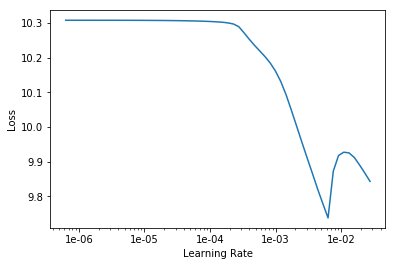

In [42]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


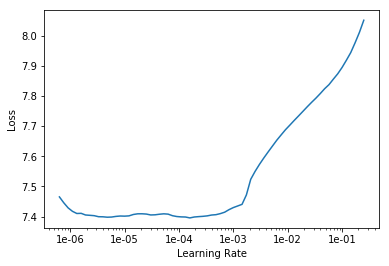

In [46]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [43]:
lr = 1e-3
lr *= bs/48 

In [44]:
learn.predict("الولايد المتحدة هي", n_words = 20)

'الولايد المتحدة هي ▁وارتفع دات ثية ▁أحضر ▁الواصل ▁درامي ▁للولاية ▁3.05 سبق ردود ▁زهر ديدان ▁معدلات ▁مقيمة ▁لمعهد ▁وطلاب 主 ▁الشن ▁مرح ▁مزارع'

In [33]:
# at old learning rate of 3e-3:
# learn.unfreeze()
# learn.fit_one_cycle(1, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.640102,4.592846,0.269030,14:33


In [45]:
learn.unfreeze()
learn.fit_one_cycle(1, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.487538,7.436563,0.061814,14:20


In [47]:
learn.unfreeze()
learn.fit_one_cycle(3, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.458905,5.557184,0.191316,14:33
1,4.869153,4.849638,0.245949,14:23
2,4.602269,4.635303,0.266800,14:26


In [48]:
learn.predict("الولايد المتحدة هي", n_words = 20)

'الولايد المتحدة هي ▁مجموعة ▁مدمجة ▁بين ▁المعالج ▁والم عالج ة ▁والتي ▁وصفت ▁بالم غامر ة ▁حيث ▁أن ▁ألواح ▁محتوى ▁جهاز ها ▁يخرج ▁إلى'

In [49]:
learn.unfreeze()
learn.fit_one_cycle(3, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.726079,4.827960,0.246758,14:26
1,4.498085,4.597696,0.266236,14:24
2,4.383369,4.409509,0.286817,14:36


In [52]:
learn.to_fp32().save("/onepanel/fast_ai_nlp/ar_model", with_opt=False)
learn.data.vocab.save("/onepanel/fast_ai_nlp/ar_vocab.pkl")

In [53]:
learn.unfreeze()
learn.fit_one_cycle(4, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.589509,4.703634,0.256375,33:41
1,4.486837,4.854520,0.250765,33:43


KeyboardInterrupt: 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


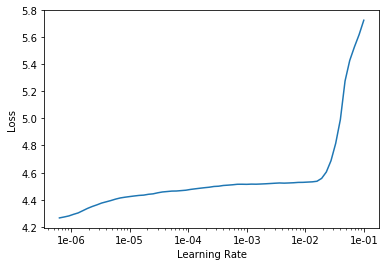

In [34]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

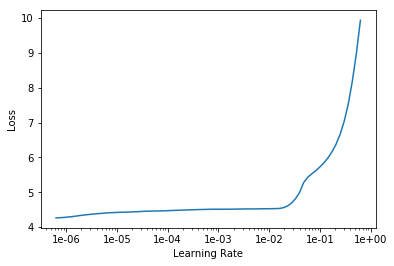

In [39]:
learn.recorder.plot()

In [35]:
learn.predict("الولايد المتحدة هي", n_words = 20)

'الولايد المتحدة هي ▁نطاق ات ▁أدار ية ▁وت خص ية ▁خاصة ▁للعاملين ▁والإ غا دة . ▁تم ▁تطوير ▁منطقة ▁الحوض ▁من ▁قبل ▁مجموعة'

In [40]:
learn.unfreeze()
learn.fit_one_cycle(5, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.747396,4.975077,0.235815,14:30


KeyboardInterrupt: 

In [ ]:
#pip install -U "fastai == 1.0.60"
#pip install spacy -U
#https://stackoverflow.com/questions/59788395/fastai-failed-initiation-of-language-model-in-sentence-piece-processor-cache